Below are some useful exercises to experiment on.

1) Empire States Random Walk by Dice Roll

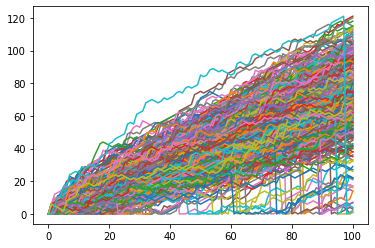

In [9]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1037655954)

# simulate random walk 500 times
walks = []

for i in range(500) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice < 3:
            step = max(0, step - 1)
        elif dice < 6:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    walks.append(random_walk)

# create and plot np_aw_t
np_aw_t = np.transpose(np.array(walks))
plt.clf()
plt.plot(np_aw_t)
plt.show()

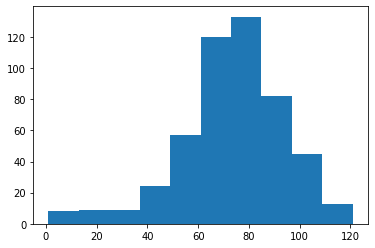

In [10]:
# select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [13]:
# the probability of ending at the 60th floor or higher
print("Probability of ending at the 60th step or higher is:", str(round(((ends >= 60).sum() / 500) * 100, 2)) + "%")

Probability of ending at the 60th step or higher is: 79.6%
